# Dynamical Systems & Applications — 05/10/23
## An introduction to Topological Data Analysis
https://raphaeltinarrage.github.io/

A set of tutorials for the gudhi library are found at https://github.com/GUDHI/TDA-tutorial

- ### I/IV: Preliminaries
1. Betti numbers of a simplicial complex
2. Persistent homology of a filtered simplicial complex
3. Čech and Rips complex of a point cloud
4. Stability theorem

- ### II/IV: Exercise 1: Rotating images

- ### III/IV: Exercise 2: Cyclo-octane molecules

- ### IV/IV: Exercise 3: Flute and clarinette

In [1]:
import gudhi 
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition
import scipy

### I.1. Betti numbers of a simplicial complex

We will encode a triangulation of the circle. The main structure of gudhi is that of simplex tree.

In [2]:
# We build a SimplexTree structure on gudhi

st = gudhi.SimplexTree()

# We add the vertices

st.insert([0])
st.insert([1])
st.insert([2])

# We add the edges

st.insert([0,1])
st.insert([1,2])
st.insert([2,0])

True

In [3]:
# Let us verify that the simplices have been correctly added

print(list(st.get_simplices()))

[([0, 1], 0.0), ([0, 2], 0.0), ([0], 0.0), ([1, 2], 0.0), ([1], 0.0), ([2], 0.0)]


The list above contains elements of the form $(\sigma,t)$, where $\sigma$ is a simplex, and $t$ the value at which it enters the filtration. At this point, we do not considered *filtered* simplicial complexes, but simply simplicial complexes, hence we only have $t=0$.

In [4]:
# Let us compute the Betti numbers of our simplicial complex

st.compute_persistence(persistence_dim_max=True) # this function must be launched first
betti_numbers = st.betti_numbers()

print('The Betti numbers are:')
for i in range(len(betti_numbers)): print('Beta_'+repr(i)+' = '+repr(betti_numbers[i]))

The Betti numbers are:
Beta_0 = 1
Beta_1 = 1


We observe above the Betti numbers of the circle.
We now add a 2-simplex to our simplicial complex.

In [5]:
# Let us add a vertex and a triangle to our simplicial complex.

st.insert([0,1,3])

# We compute the betti numbers again

st.compute_persistence(persistence_dim_max=True) # this function must be launched first
betti_numbers = st.betti_numbers()

print('The Betti numbers are:')
for i in range(len(betti_numbers)): print('Beta_'+repr(i)+' = '+repr(betti_numbers[i]))

The Betti numbers are:
Beta_0 = 1
Beta_1 = 1
Beta_2 = 0


The Betti numbers remain the same.

### I.2.Persistent homology of a filtered simplicial complex

With gudhi, we can define our own filtrations of simplicial complexes.
We build the filtration:
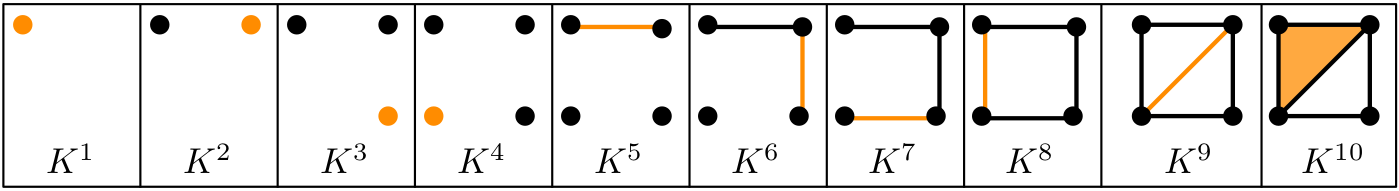
with the following filtration values: $t(\sigma) = 0$ for the vertices, $t(\sigma) = \frac{1}{2}$ for the edges of the square, $\frac{\sqrt{2}}{2}$ for the diagonal edge and $2$ for the triangle.

In [6]:
st = gudhi.SimplexTree()

# insert vertices
st.insert([0]) # the default filtration value is 0
st.insert([1])
st.insert([2])
st.insert([3])

# insert edges
st.insert([0,1], 1/2) # we give the filtration value 1/2
st.insert([1,2], 1/2)
st.insert([2,3], 1/2)
st.insert([3,0], 1/2)

#insert diagonal and triangle
st.insert([1,3], np.sqrt(2)/2)
st.insert([0,1,3], 1)

True

In [7]:
# We compute the barcode

barcode = st.persistence(homology_coeff_field = 2)
print(barcode)

[(1, (0.5, inf)), (1, (0.7071067811865476, 1.0)), (0, (0.0, inf)), (0, (0.0, 0.5)), (0, (0.0, 0.5)), (0, (0.0, 0.5))]


The barcode is a list of elements of the form $(\mathrm{dim}, (t_\mathrm{birth}, t_\mathrm{death}))$. It can be plotted as follows:

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

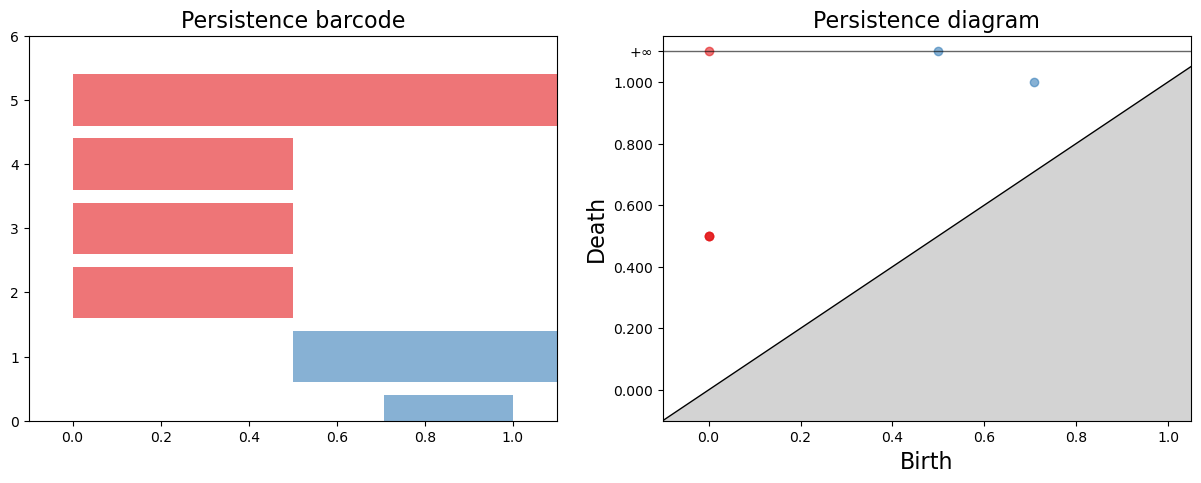

In [8]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)

gudhi.plot_persistence_barcode(barcode, axes = ax1)
gudhi.plot_persistence_diagram(barcode, axes = ax2)

### I.3.Čech and Rips complex of a point cloud

The Čech and Rips are obtained respectively via

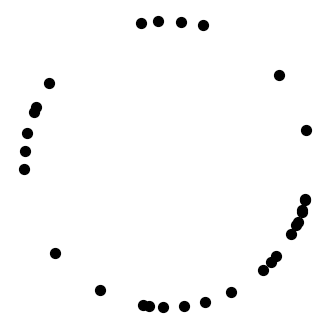

In [9]:
# Sample point on the circle

npoints = 30

X = np.random.randn(2, npoints)
X = (X/np.linalg.norm(X, axis=0)).T

# Plot

fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:,0],X[:,1], c='black', s=50)
plt.axis('equal'); plt.axis('off'); plt.show()

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

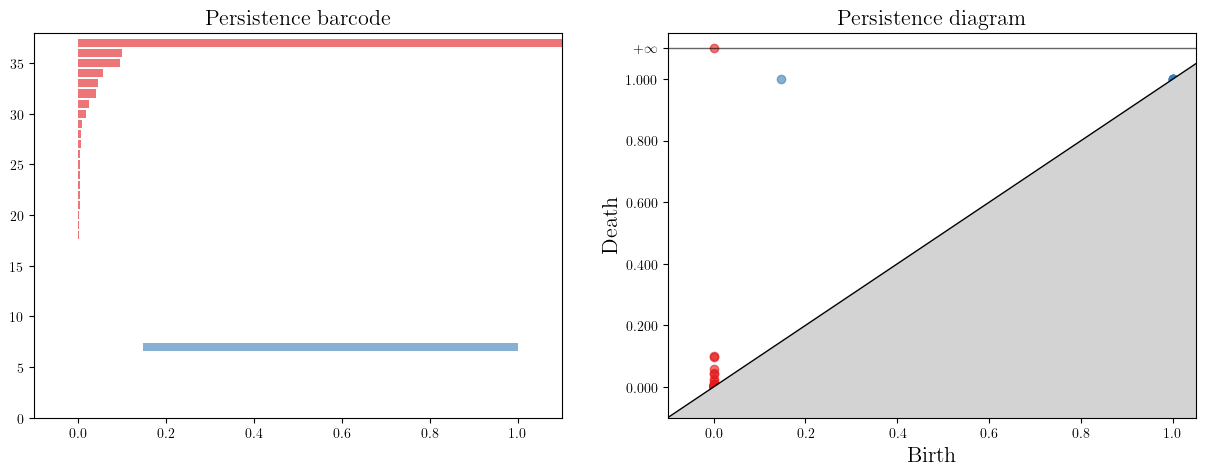

In [10]:
# Compute Cech complex and plot

alpha = gudhi.AlphaComplex(points = X)
st = alpha.create_simplex_tree()

# Plot

barcodes = st.persistence(homology_coeff_field = 2)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)

gudhi.plot_persistence_barcode(barcodes, axes = ax1)
gudhi.plot_persistence_diagram(barcodes, axes = ax2)

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

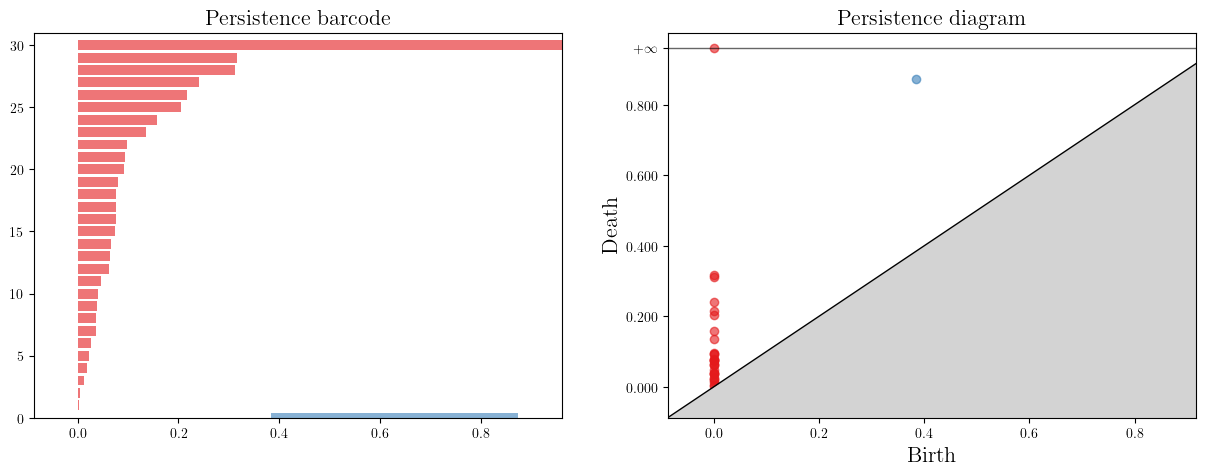

In [11]:
# Compute Rips complex and plot

rips = gudhi.RipsComplex(points = X/2, max_edge_length = 1) # divide by 2 because of gudhi's convention
st = rips.create_simplex_tree(max_dimension=2) # we add the simplices up to dimension 2

# Plot

barcodes = st.persistence(homology_coeff_field = 2)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)

gudhi.plot_persistence_barcode(barcodes, axes = ax1)
gudhi.plot_persistence_diagram(barcodes, axes = ax2)

### I.4.Stability theorem

We will observe the stability theorem: for any finite point clouds $X$ and $Y$, by denoting $\mathbb{U}$ and $\mathbb{V}$ the persistence modules of $i^\text{th}$ homology associated to their Rips complexes, then
$$\text{d}_\text{b}(\mathbb{U},\mathbb{V}) \leq \text{d}_\text{H}(\mathbb{U},\mathbb{V}),$$
where $\text{d}_b$ is the bottleneck distance and $\text{d}_H$ the Hausdorff distance.

To do so, we generate two point clouds:

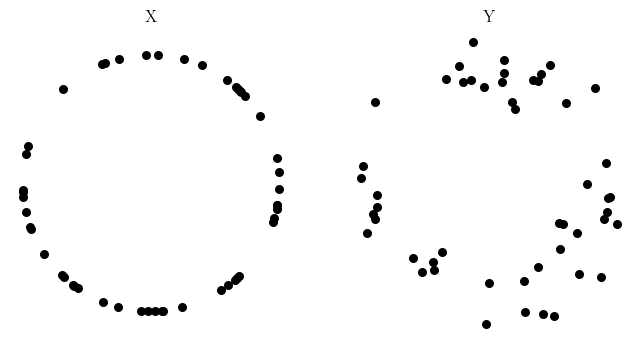

In [12]:
# Sample

npoints = 50
sd = 0.15

X = np.random.randn(2, npoints)
X = (X/np.linalg.norm(X, axis=0)).T

Y = np.random.randn(2, npoints)
Y = (Y/np.linalg.norm(Y, axis=0)).T + np.random.normal(0, sd,  (npoints, 2))

# Plot

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)
ax1.scatter(X[:,0],X[:,1], c='black', s=30); ax1.axis('equal'); ax1.axis('off'); ax1.set_title('X');
ax2.scatter(Y[:,0],Y[:,1], c='black', s=30); ax2.axis('equal'); ax2.axis('off'); ax2.set_title('Y');

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

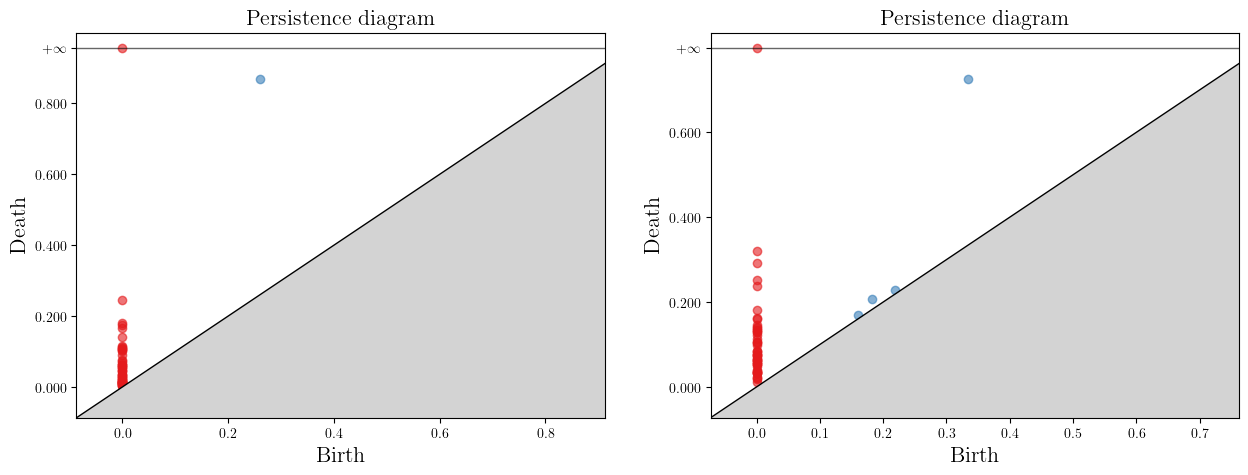

In [13]:
stX = gudhi.RipsComplex(points = X/2, max_edge_length = 2).create_simplex_tree(max_dimension=2)
barcodeX = stX.persistence(homology_coeff_field = 2)

stY = gudhi.RipsComplex(points = Y/2, max_edge_length = 2).create_simplex_tree(max_dimension=2)
barcodeY = stY.persistence(homology_coeff_field = 2)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)
gudhi.plot_persistence_diagram(barcodeX, axes = ax1)
gudhi.plot_persistence_diagram(barcodeY, axes = ax2)

In [14]:
barcodeX_0 = stX.persistence_intervals_in_dimension(0)
barcodeY_0 = stY.persistence_intervals_in_dimension(0)
bottleneck_distance_0 = gudhi.bottleneck_distance(barcodeX_0, barcodeY_0)
print('Bottleneck distance between H_0 barcodes:', bottleneck_distance_0)

barcodeX_1 = stX.persistence_intervals_in_dimension(1)
barcodeY_1 = stY.persistence_intervals_in_dimension(1)
bottleneck_distance_1 = gudhi.bottleneck_distance(barcodeX_1, barcodeY_1)
print('Bottleneck distance between H_1 barcodes:', bottleneck_distance_1)

Hausdorff_distance = max(scipy.spatial.distance.directed_hausdorff(X, Y)[0], scipy.spatial.distance.directed_hausdorff(Y, X)[0])
print('Hausdorff distance:', Hausdorff_distance)

print('The stability theorem states', bottleneck_distance_0, '<', Hausdorff_distance, 'and ', bottleneck_distance_1, '<', Hausdorff_distance)

Bottleneck distance between H_0 barcodes: 0.11167571751938668
Bottleneck distance between H_1 barcodes: 0.14331804728423458
Hausdorff distance: 0.3545076260807891
The stability theorem states 0.11167571751938668 < 0.3545076260807891 and  0.14331804728423458 < 0.3545076260807891


![SegmentLocal](data/obj1.gif "segment")

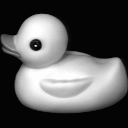

## II. Rotating images

The following collection of images comes from https://www.cs.columbia.edu/CAVE/software/softlib/coil-20.php

Each of the files `cloud1.txt`, ..., `cloud10.txt` in the folder `./data` contain $72$ images of size $128\times128$ pixels. These images are different views of a same object.

|   |   |   |   |   |
|---|---|---|---|---|
| ![SegmentLocal](data/obj1.gif "segment")|![SegmentLocal](data/obj2.gif "segment") |![SegmentLocal](data/obj3.gif "segment")|  ![SegmentLocal](data/obj4.gif "segment") |![SegmentLocal](data/obj5.gif "segment") |
| ![SegmentLocal](data/obj6.gif "segment")|  ![SegmentLocal](data/obj7.gif "segment") |![SegmentLocal](data/obj8.gif "segment")|  ![SegmentLocal](data/obj9.gif "segment") |![SegmentLocal](data/obj10.gif "segment") |
|   |   |   |   |   |

You can access to the $i^\text{th}$ object by calling `OpenRotatingImages(i)`. The output, `matrix`, is a $72\times 16384$ matrix. 

For every $j \in [ 0,71]$, `matrix[j,:]` is the $j^\text{th}$ picture of the $i^\text{th}$ object.
It has been preprocessed as follows: the $128\times 128$-image has been converted into a $16384$-array. For instance, we open the second object below, and print its third view.

**<span style="color:darkmagenta">Question:</span>** 
For some $i$'s in $[1,10]$, compute the Betti curves of the set $X \subset \mathbb{R}^{16384}$ defined as follows: $X$ consists in $72$ points, the different views of the $i^\text{th}$ object. Guess the topology of the underlying object for $i=1,4,7$ and $10$.

In [15]:
def OpenRotatingImages(i):
    file = 'data/cloud'+str(i)+'.txt'
    matrix = open(file).read()
    matrix = np.asarray([[float(a) for a in item.split()] for item in matrix.split('\n')[:-1]])
    return matrix

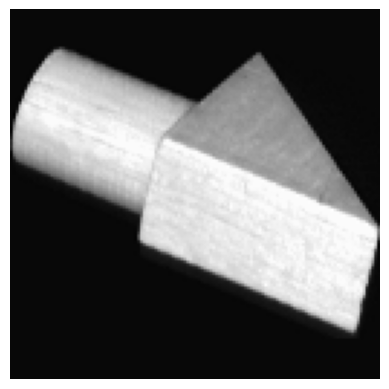

In [16]:
matrix = OpenRotatingImages(2)

image = np.reshape(matrix[2], (128,128))
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.axis('off'); plt.show()

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

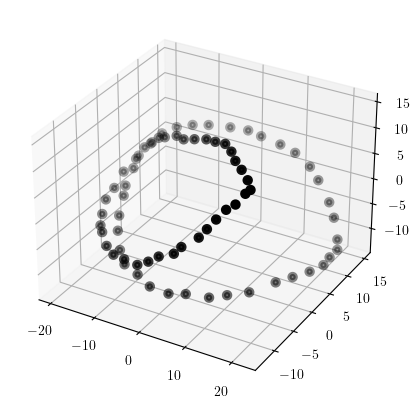

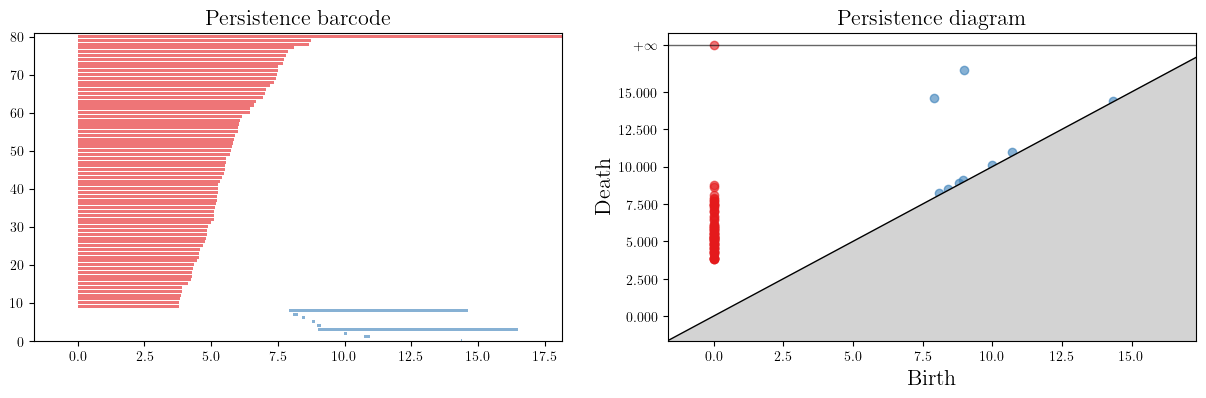

In [17]:
i = 10
X = OpenRotatingImages(i)

# Plot PCA

pca = sklearn.decomposition.PCA(n_components=3)
Xpxa = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(Xpxa[:,0], Xpxa[:,1], Xpxa[:,2], color = 'black', lw = 3)

# Create rips complex

rips = gudhi.RipsComplex(points = X/2, max_edge_length = np.inf)
st = rips.create_simplex_tree(max_dimension = 2)

# Compute persistence

barcode = st.persistence(homology_coeff_field = 2)

# Plot

fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)

gudhi.plot_persistence_barcode(barcode, axes = ax1)
gudhi.plot_persistence_diagram(barcode, axes = ax2)

**<span style="color:darkorange">Answer:</span>**
For $i= 1,4, 20$, we observe a circle, and for $i=7,10,13$ a bouquet of two circles.

## III.Cyclo-octane molecules

In https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3188624/ is studied the cyclo-octane molecule $\mathrm{C}_8\mathrm{H}_{16}$.

The configuration of such a molecule can be represented by 72 variables---the 3D coordinates of each of its 24 atoms---, or equivalently, by a point in $\mathbb{R}^{72}$. 
By analyzing many of these molecules, the authors obtain a point cloud in $\mathbb{R}^{72}$.
In this large dimensional space, it turns out that the point cloud lies on an object of much smaller dimension, namely, the union of a sphere and a Klein bottle, intersecting in two rings.

> To perform this decomposition, we used point set triangulation. [...] The triangulation was obtained using a modified version of an incremental surface reconstruction algorithm for high-dimensional data.

> For each of the five triangulations, we obtained **Betti numbers $(1,1,2)$**. Betti numbers can be used to classify compact connected (manifold) surfaces without boundary, but since the cyclo-octane surface is nonmanifold, the Betti numbers $(1,1,2)$ are uninformative. However, using our triangulation of the conformation space, we decomposed the object into the two components [...]: the outer sphere and the enclosed hourglass. Both of these objects were found to be compact connected (manifold) surfaces without boundary, each sharing points on the two intersection rings.

> Unsurprisingly, the Betti numbers of the spherical component were $(1,0,1)$, which are the Betti numbers of a **sphere**. Surprisingly, the Betti numbers of the hourglass were $(1,1,0).$ These are the Betti numbers of a **Klein bottle**, which is a compact connected nonorientable surface without boundary. 

Here, we are only given the positions of the *carbon* atoms, hence we have a point cloud in $\mathbb{R}^{24}$.

**<span style="color:darkmagenta">Question:</span>**
Compute the barcodes of the Rips filtration of this dataset, up to dimension $3$, and with a maximal edge length of $0.3

**<span style="color:red">/!\ Warning:</span>**
Setting a maximal edge length higher than $0.3$ can be time consuming, and plotting the whole barcode as well.
One can select only the largest bars via 
`barcode = st.persistencemin_persistence = 0.2)`.

In [18]:
# Open file

readfile = open('data/Cy8.txt').read()
X = np.asarray([[float(a) for a in item.split()] for item in readfile.split('\n')[:-1]])

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

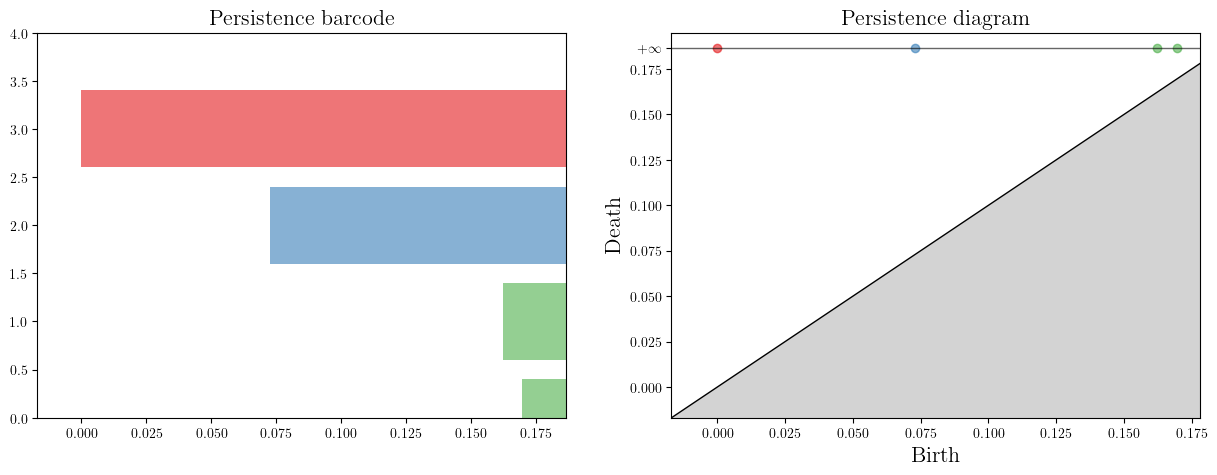

In [19]:
# Create rips complex

rips = gudhi.RipsComplex(points = X/2, max_edge_length = 0.3)
st = rips.create_simplex_tree(max_dimension = 3)

# Compute persistence

barcode = st.persistence(homology_coeff_field = 2)

# Plot only long bars

barcode = st.persistence(homology_coeff_field = 2, min_persistence = 0.2)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)

gudhi.plot_persistence_barcode(barcode, axes = ax1)
gudhi.plot_persistence_diagram(barcode, axes = ax2)

## IV. Flute and clarinette

Data coming from https://matto-reilly.github.io/TDA-TimeSeriesAnalysis/

A flute and a clarinet have been recorded playing the note A.
The recordings have been transformed into an array of length $39000$ (flute) and length $96000$ (clarinet).
They last approximately $1$ and $2$ seconds (rate $44100$ Hz).

![SegmentLocal](data/audacity.png "segment")

**<span style="color:darkmagenta">Question:</span>**
For each of the two instruments,
- extract some samples of 500 points
- embbed them into $\mathbb{R}^2$ via time delay embedding
- compute the $H^1$-barcodes of their Rips filtration
- compute the number of cycles with persistence greater than $0.015$, call them the **cycles with large persistence**
- compute the mean number of **cycles numbers with large persistence** over all the samples (of a given instrument)

Indications:
- compute a time delay embedding with the function `TimeDelayEmbedding` below, with `edim = 2` and `delay = 2`
- compute the Rips complex with max_edge_length = 0.1

In [20]:
def TimeDelayEmbedding(x,edim,delay=1):
    """time delay embedding of a d-dim times series into R^{d*edim}
    the time series is assumed to be periodic
    parameters:
        + x: a list of d lists of same length L or a dxL numpy array
        + edim: the number of points taken to build the embedding in R^{d*edim}
        + delay: embeeding given by (x[i],x[i+delay],...,x[i + (edim-1)*delay])
            Default value for delay is 1
    """
    ts = np.asarray(x)
    if len(np.shape(ts)) == 1:
        ts = np.reshape(ts,(1,ts.shape[0]))
    ts_d = ts.shape[0]
    ts_length = ts.shape[1]
    output = ts
    for i in range(edim-1):
        output = np.concatenate((output,np.roll(ts,-(i+1)*delay,axis=1)),axis=0)
    return output

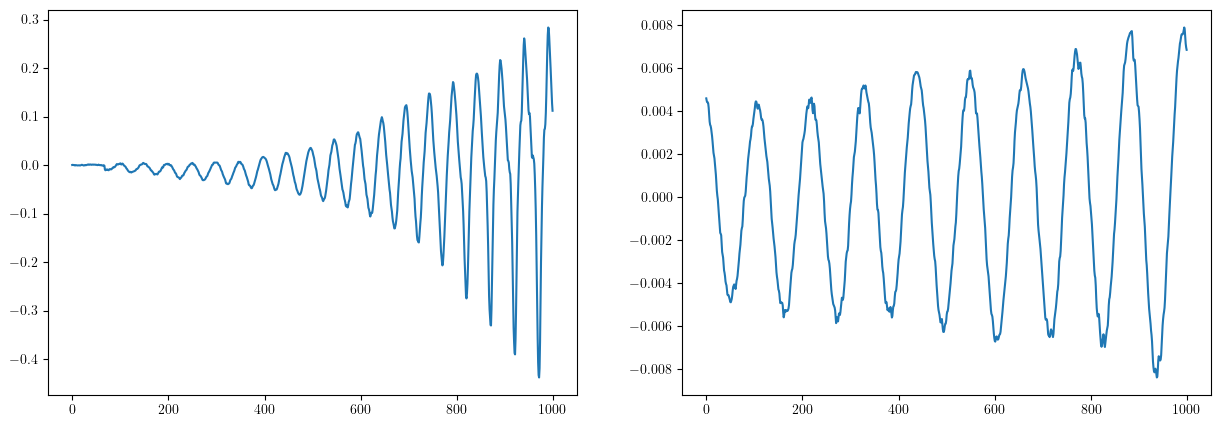

In [21]:
# Open datasets

flute = np.genfromtxt('data/flute.csv', delimiter=',')
clarinet = np.genfromtxt('data/clarinet.csv', delimiter=',')

# Plot beginning of datasets

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)
ax1.plot(range(1000), flute[0:1000])
ax2.plot(range(1000), clarinet[0:1000])

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

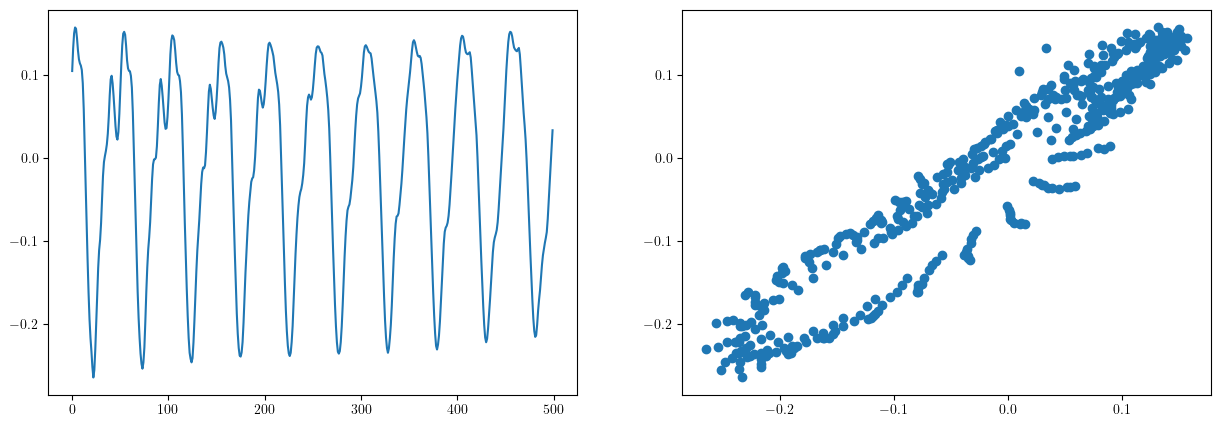

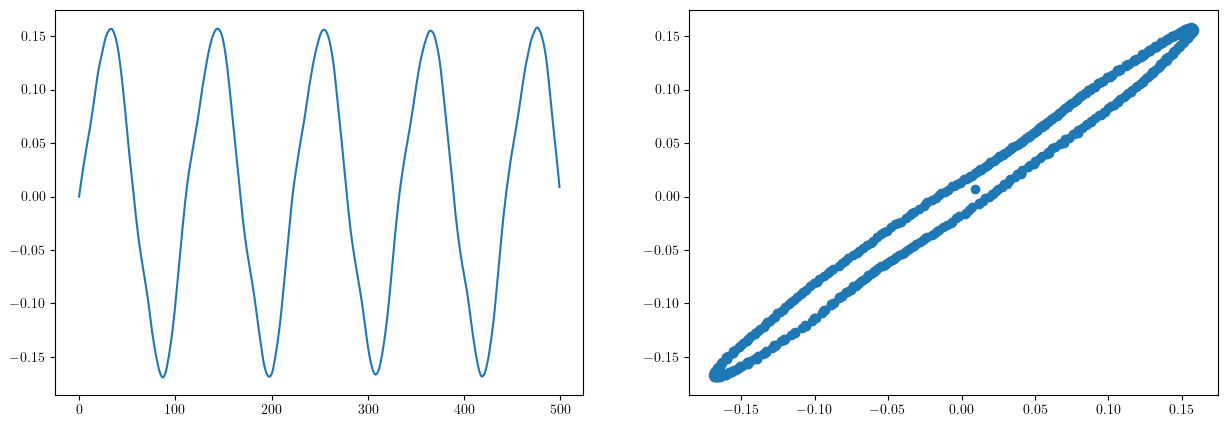

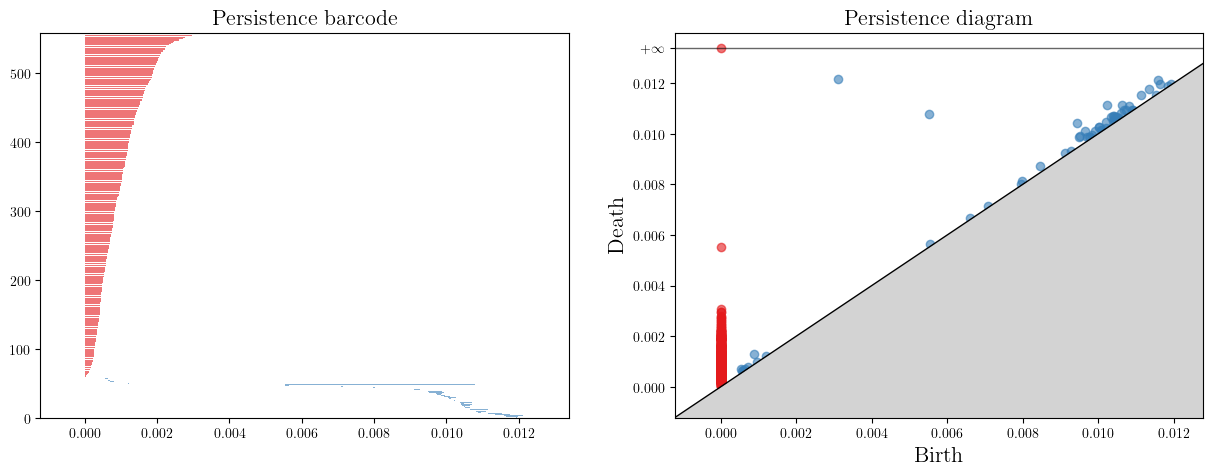

In [22]:
# Time delay embedding of flute

len_sample = 500
i = np.random.randint(0,len(flute)-len_sample)
sample = flute[i:i+len_sample]

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)
ax1.plot(range(len(sample)), sample)

tde = TimeDelayEmbedding(sample, edim=2, delay=2)
plt.scatter(tde[0,:],tde[1,:])

# Time delay embedding of clarinet

len_sample = 500
i = np.random.randint(0,len(clarinet)-len_sample)
sample = clarinet[i:i+len_sample]

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)
ax1.plot(range(len(sample)), sample)

tde = TimeDelayEmbedding(sample, edim=2, delay=2)
plt.scatter(tde[0,:],tde[1,:])

# Example of barcode

rips = gudhi.RipsComplex(points = tde.T/2, max_edge_length = 0.1)
st = rips.create_simplex_tree(max_dimension=2)

barcode = st.persistence(homology_coeff_field = 2)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)

gudhi.plot_persistence_barcode(barcode, axes = ax1)
gudhi.plot_persistence_diagram(barcode, axes = ax2)

In [23]:
# Mean number of cycles for flute

Betti_flute = []

N = 10
for a in range(N):
    len_sample = 500
    i = np.random.randint(0,len(flute)-len_sample)
    sample = flute[i:i+len_sample]

    delay = 2
    tde = TimeDelayEmbedding(sample, edim=2, delay=delay)    

    st = gudhi.RipsComplex(points = tde.T/2, max_edge_length = 0.1).create_simplex_tree(max_dimension=2)
    barcode = st.persistence(homology_coeff_field = 2)
    pers = np.array([I[1]-I[0] for I in st.persistence_intervals_in_dimension(1)])
    Betti_flute.append(sum(pers>0.015))

Betti_flute_mean = np.mean(Betti_flute)

print('Betti_flute_mean = '+repr(Betti_flute_mean))
print('Betti_flute = '+repr(Betti_flute))

Betti_flute_mean = 2.2
Betti_flute = [2, 2, 3, 2, 0, 4, 4, 2, 1, 2]


In [24]:
# Mean number of cycles for clarinet

Betti_clarinet = []

N = 10
for a in range(N):
    len_sample = 500
    i = np.random.randint(0,len(flute)-len_sample)
    sample = flute[i:i+len_sample]

    delay = 1
    takens = TimeDelayEmbedding(sample, edim=2, delay=delay)    

    st = gudhi.RipsComplex(points = takens.T/2, max_edge_length = 0.1).create_simplex_tree(max_dimension=2)
    barcode = st.persistence(homology_coeff_field = 2)
    pers = np.array([I[1]-I[0] for I in st.persistence_intervals_in_dimension(1)])
    Betti_clarinet.append(sum(pers>0.015))

Betti_clarinet_mean = np.mean(Betti_clarinet)

print('Betti_clarinet_mean = '+repr(Betti_clarinet_mean))
print('Betti_clarinet = '+repr(Betti_clarinet))

Betti_clarinet_mean = 1.3
Betti_clarinet = [2, 0, 2, 4, 0, 0, 0, 0, 1, 4]


In [25]:
print('The mean number of cycles with large persistence for the flute is '+repr(Betti_flute_mean))
print('The mean number of cycles with large persistence for the clarinet is '+repr(Betti_clarinet_mean))

The mean number of cycles with large persistence for the flute is 2.2
The mean number of cycles with large persistence for the clarinet is 1.3
